<a href="http://lnls.cnpem.br/"><img src="http://fig.if.usp.br/~biofisic/images/logo_lnls.jpg" style="width:90px; float: left;"></a><h1>Script Converter</h1>

----

#  Script converter MATLAB in Python3

### This script is made to calculate the multipoles errors of the Booster and Storage Ring Magnets for data analysis in rotating coil bench.


> Considerations:
   The multipoles are calculated with database specs and limits provided by FAC.
   The original script was developed in MatLAB.
   This script is intended to transcribe MATLAB to Python multipoles limits.
>

In [2]:
#Library
import numpy as np
import random
import matplotlib.pyplot as plt


In [3]:
#Plot in line, if necessary
%matplotlib inline 

In [8]:
class constants(object):
    def __init__(self):
        self.r0 = 17.5 # reference radius [m]
        self.p = 2     # Quadrupoles
        
        # sys spec: integrated multipoles from rotating coil measurements of QF
        # prototypes calculated at r0 and relative to integrated quadrupole at r0
        self.normal_sys_monomials = np.array([8,14])
        self.normal_sys_relative_multipoles_at_r0 = np.array([-2.5e-2, -1.5e-2])
        
        # rms spec: integrated multipoles calculated at r0 and relative to integrated quadrupole at r0
        self.normal_rms_monomials = np.array([3,4,5,6,7,8,9,14])
        self.normal_rms_relative_multipoles_at_r0 = np.array([4,4,4,4,4,4,4,4])*1e-4
        
        # sys spec: integrated multipoles from rotating coil measurements of QF
        # prototypes calculated at r0 and relative to integrated quadrupole at r0
        self.skew_sys_monomials = np.array([2])
        self.skew_sys_relative_multipoles_at_r0 = np.array([0])
        
        self.skew_rms_monomials = np.array([3,4,5,6,7,8,9,14])
        self.skew_rms_relative_multipoles_at_r0 = np.array([1,1,1,1,1,1,1,1])*1e-4
        
        # Positions to plot residual field [m] (x axis)
        self.x = np.linspace(-18,18,37)
        

    def sx_residual_field(self):
        #Normal residual field
        self.plot_residual_field('NORMAL', self.p, self.r0, self.x, self.normal_sys_monomials, 
                                 self.normal_sys_relative_multipoles_at_r0,
                                 self.normal_rms_monomials, self.normal_rms_relative_multipoles_at_r0)
        #Skew residual field
        self.plot_residual_field('SKEW', self.p, self.r0, self.x, self.skew_sys_monomials, 
                                 self.skew_sys_relative_multipoles_at_r0, 
                                 self.skew_rms_monomials, self.skew_rms_relative_multipoles_at_r0)
        
    def plot_residual_field(self, label, p, r0, x, sys_monomials, sys_relative_multipoles_at_r0, 
                            rms_monomials, rms_relative_multipoles_at_r0):
        
        self.nr_samples = 5000
        self.gauss_trunc = 1
        
        #Systematic residual
        self.sys_residue = 0*x
        self.sys_residue = list(self.sys_residue)
        for i in range (len(sys_monomials)):
            self.sys_residue = self.sys_residue + 1*sys_relative_multipoles_at_r0[i]*(self.x/self.r0)**(sys_monomials[i]-p) 
            
        size = len(rms_relative_multipoles_at_r0)*self.nr_samples
        rnd_grid = np.array([])

        #Making the random normal distribution
        while (len(rnd_grid) < size):           
            randomgauss = random.gauss(0,1)
            if (abs(randomgauss) > self.gauss_trunc):
                randomgauss = []
            rnd_grid = np.append(rnd_grid, randomgauss)           
        rnd_grid = rnd_grid.reshape(self.nr_samples,(size/self.nr_samples))

        max_residue = self.sys_residue
        min_residue = self.sys_residue
        
        #Use rows of random grid for calculate the relative rms and residual field
        for j in range (self.nr_samples): 
            rnd_vector = rnd_grid[j,:]
            rnd_relative_rms = (rms_relative_multipoles_at_r0)*rnd_vector
            rms_residue = 0                        
            for i in range (len(rms_monomials)):     
                rms_residue = rms_residue + 1*rnd_relative_rms[i]*(x/r0)**(rms_monomials[i]-p)
                
            residue_field = self.sys_residue + rms_residue
            
            #Maximum residual values
            max_residue = np.maximum(residue_field, max_residue)
            #Minimum residual values
            min_residue = np.minimum(residue_field, min_residue)
            

        #Plot Figure
        plt.plot(x, self.sys_residue, '-b', label=label)
        plt.plot(x, max_residue, '-r')
        plt.plot(x, min_residue, '-r')
        plt.title('Allowed - red, systematic - blue')
        plt.xlabel('pos [mm]')
        plt.ylabel('relative residual integrated field')
        plt.grid('on')
        plt.show()


C:\Python34\lib\site-packages\ipykernel\__main__.py:58: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


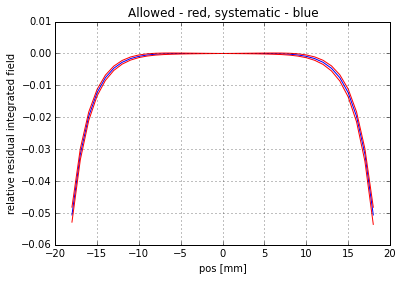

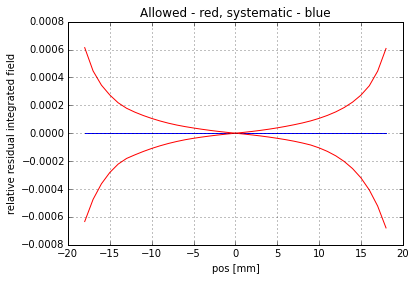

In [9]:
a = constants()
a.sx_residual_field()